#### Examining movie ratings from Fandango's Scores

- After the strongly left skewed distribution of ratings (Fandango puntuation was generally high or very high for movies). Fandango's officials replied that the biased rounding off was caused by a bug in their system rather than being intentional, and they promised to fix the bug as soon as possible. 

- We'll analyze more recent movie ratings data to determine whether there has been any change in Fandango's rating system after Hickey's analysis (potential intentional biased and dishonest rating system).

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import kurtosis, skew
%matplotlib inline

In [2]:
fsc = pd.read_csv("fandango_score_comparison.csv")
mr_16_17 = pd.read_csv("movie_ratings_16_17.csv")

###### Information about the data:
- fandango_score_comparison.csv contains every film that has a Rotten Tomatoes rating, a RT User rating, a Metacritic score, a Metacritic User score, and IMDb score, and at least 30 fan reviews on Fandango. The data from Fandango was pulled on Aug. 24, 2015.
- movie_ratings_16_17.csv contains movie ratings data for 214 of the most popular movies (with a significant number of votes) released in 2016 and 2017. As of March 22, 2017, the ratings were up to date. Significant changes should be expected mostly for movies released in 2017.

In [3]:
fandango_before = fsc[["FILM","Fandango_Stars","Fandango_Ratingvalue","Fandango_votes","Fandango_Difference"]]
fandango_after = mr_16_17[["movie","year","fandango"]]

fandango_before['Year'] = fandango_before['FILM'].str[-5:-1]


/dataquest/system/env/python3/lib/python3.4/site-packages/ipykernel/__main__.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [4]:
fsc.shape

(146, 22)

In [5]:
mr_16_17.shape

(214, 15)

In [6]:
mr_16_17.sort_values(by="year",inplace=True)

In [7]:
mr_16_17["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

###### Population of interest = "All fandango ratings on the movies released before and after "Hickey's analysis. The goal is to analize wether the parameters of the populations change before and after that analysis."

Sample characteristics: Both of the data sets fsc and mr_16_17 had special conditions to be selected:
- The cut conditions about fsc are: movies with >30 fan reviews and online-selling tickets on fandango in 2015 up to Aug. 24. 
- The cut conditions about mr_16_17 are: movies with a "considerable" amount of user votes reviews and relesed in the years of 2016 - 2017 up to March 22.

Seems that this is not a randomly sampling practice. Clearly there are conditions to generate the samples. They are justify because of the purpose of the analysis by the author. There is some specific questions to answer about some dishonest busines practice: because of volume business reasons they fix a certain number of fan reviews or user-votes and trends to be movies with online ticket-sell.

##### Changing the goal of the analysis:
- Simply we are going to match or reproduce the initial conditions of the authors:

<i> Sampling movies with a considerable number of fan reviewers or user votes and the change reflected from 2015 to 2017 with a midline in Aug 24, 2015. 
<i/>

In [8]:
fandango_before[fandango_before["Fandango_votes"]<30].shape[0]

0

- The data set "fandango_before" contains only popular movies with over 30 reviews. This is checked above.
- the data set "fandango_after" doesn't contain information about the number of fan reviews. To check that there are only or almost only popular movies on the data set we are going to sample 10 movies and compare with the number of fan reviews based on internet.

In [9]:
fandango_after.sample(10,random_state=1)

,movie,year,fandango
108,Mechanic: Resurrection,2016,4.0
206,Warcraft,2016,4.0
106,Max Steel,2016,3.5
107,Me Before You,2016,4.5
51,Fantastic Beasts and Where to Find Them,2016,4.5
33,Cell,2016,3.0
59,Genius,2016,3.5
152,Sully,2016,4.5
4,A Hologram for the King,2016,3.0
31,Captain America: Civil War,2016,4.5


In [10]:
Collected_data = {"Mechanic: Resurrection":2247,"Warcraft":7277,"Max Steel":493,"Me Before You":5267,"Fantastic Beasts and Where to Find Them":13424,"Cell":17,"Genius":127,"Sully":11877,"A Hologram for the King":500,"Captain America: Civil War":35057}
cont_not_popular = 0
for value in Collected_data.values():
    if value<30:
        cont_not_popular +=1

print(cont_not_popular/10)

0.1


- As we can see, only 10% of the movies has under 30 reviews. We are going to assume that all the data set is good enough to do the analysis.

In [11]:
fandango_before["Year"].value_counts()

2015    129
2014     17
Name: Year, dtype: int64

In [12]:
fandango_after["year"].value_counts()

2016    191
2017     23
Name: year, dtype: int64

In [13]:
fandango_2015 = fandango_before.loc[fandango_before["Year"]=="2015"]
fandango_2016 = fandango_after.loc[fandango_after["year"]==2016]

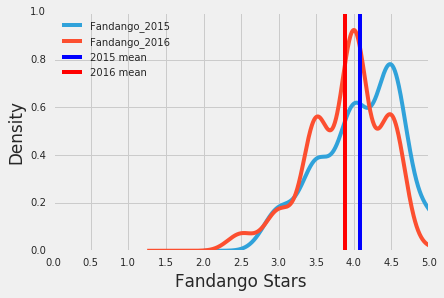

In [14]:
plt.style.use('fivethirtyeight')
fandango_2015["Fandango_Stars"].plot.kde(label="Fandango_2015",legend=True)  #Lindos gráficos. se ve lo mismo que en el código anterior pero más suave. 
fandango_2016["fandango"].plot.kde(label="Fandango_2016",legend=True)
#plt.axvline(wnba["MIN"].mean().round(0),label="Average")
plt.xlim(0,5)
plt.xlabel("Fandango Stars")
plt.xticks([0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0])
plt.axvline(fandango_2015["Fandango_Stars"].mean(),color="blue",label="2015 mean")
plt.axvline(fandango_2016["fandango"].mean(),color="red",label="2016 mean")
plt.legend(loc="upper left")

In [15]:
print("skew 2015 :",skew(fandango_2015["Fandango_Stars"]))
print("skew 2016 :",skew(fandango_2016["fandango"]))

skew 2015 : -0.41836245240068665
skew 2016 : -0.6459635466459924


In [16]:
print("kurtosis 2015 :",kurtosis(fandango_2015["Fandango_Stars"]))
print("kurtosis 2016 :",kurtosis(fandango_2016["fandango"]))

kurtosis 2015 : -0.5853684193441397
kurtosis 2016 : 0.14861700234496356


- The shape of each distributions are skewed to the right (like skew factors says). Also the kurtosis factors are differents but less than

$$ p= 1/2 \pm \sqrt{1/12}.

- Their forms are similar, but that of 2015 is clearly more biased to the right than that of 2016. From this we can infer that before the Hickey analysis, the ratings tended to be higher.

In [17]:

a1 = (fandango_2015["Fandango_Stars"].value_counts(normalize=True).sort_index()*100).round(2)
a1

3.0     8.53
3.5    17.83
4.0    28.68
4.5    37.98
5.0     6.98
Name: Fandango_Stars, dtype: float64

In [18]:
b1 = (fandango_2016["fandango"].value_counts(normalize=True).sort_index()*100).round(2)
b1

2.5     3.14
3.0     7.33
3.5    24.08
4.0    40.31
4.5    24.61
5.0     0.52
Name: fandango, dtype: float64

- Again we can note like in the kernel density plots above that the stars goes a little bit to the left in 2016: appears the value of 2.5 and the most often value becomes 4.0 (instead of 4.5 from 2015).

##### Computing the mean, median and the mode for both distributions

In [19]:
mean_2015 = (fandango_2015["Fandango_Stars"].mean()).round(2)
mean_2016 = (fandango_2016["fandango"].mean()).round(2)

print("2015 Mean: ",mean_2015)
print("2016 Mean: ",mean_2016)

2015 Mean:  4.09
2016 Mean:  3.89


In [20]:
median_2015 = (fandango_2015["Fandango_Stars"].median())
median_2016 = (fandango_2016["fandango"].median())

print("2015 Median: ",median_2015)
print("2016 Median: ",median_2016)

2015 Median:  4.0
2016 Median:  4.0


In [21]:
mode_2015 = (fandango_2015["Fandango_Stars"].mode()[0]).round(2)
mode_2016 = (fandango_2016["fandango"].mode()[0]).round(2)

print("2015 Mode: ",mode_2015)
print("2016 Mode]: ",mode_2016)

2015 Mode:  4.5
2016 Mode]:  4.0


- From the the statistics calculated before, we can see that the mean and the mode are higher in 2015 than 2016. This is in the way of the conjecture formulated a few cell before.
- There is a difference but is slight one.

In [22]:
summary = pd.DataFrame()
summary['2015'] = [mean_2015, median_2015, mode_2015]
summary['2016'] = [mean_2016, median_2016, mode_2016]
summary.index = ['mean', 'median', 'mode']
summary

,2015,2016
mean,4.09,3.89
median,4.00,4.00
mode,4.50,4.00


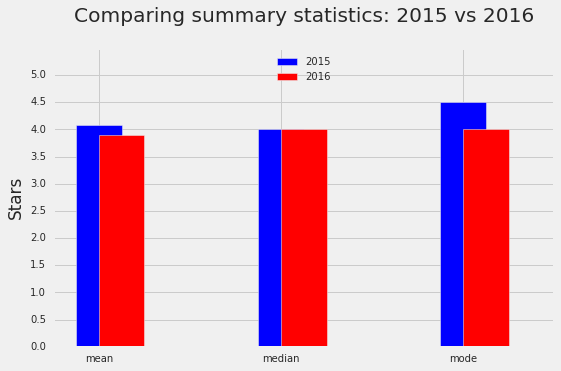

In [23]:
plt.style.use('fivethirtyeight')
summary['2015'].plot.bar(color = 'blue', align = 'center', label = '2015', width = .25)
summary['2016'].plot.bar(color = 'red', align = 'edge', label = '2016', width = .25,
                         rot = 0, figsize = (8,5))

plt.title('Comparing summary statistics: 2015 vs 2016', y = 1.07)
plt.ylim(0,5.5)
plt.yticks(np.arange(0,5.1,.5))
plt.ylabel('Stars')
plt.legend(framealpha = 0, loc = 'upper center')
plt.show()

##### Final conclusions: 
The small difference observed between the years 2015 and 2016 could finally be due to a correction in the errors argued by the people of Fandango.
Anyways the punctuations trends to be skewed to the left.

In summary, in the rankings of Fandango we can find a higher score, that is, a score that is too optimistic for all films in general.